In [207]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np 
import matplotlib.pyplot as plt

print(tf.__version__)

2.18.0


In [208]:
fashion_mnist = keras.datasets.fashion_mnist
# da bih ucitao podatke pozivam fciju load_data() 
# load_data() nam vraca dva uredjena para
# prvi uredjen par je skup slika i njihovih labela, tj. kojim kategorijama pripadaju 

# drugi par je skup slika za testiranje i odgovarajucih labela

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [209]:
# posto se ove celije u jupiteru kesiraju, svi rezultati ce biti sacuvani u ova dva skupa i mozemo da ih koristimo kroz ostatak celija 

In [210]:
# vizualizacija 

# vidimo da prva slika pripada label 9, druga 0 treca 0 itd itd... i tih kategorija ima 10 i unoformno su rasporedjeni, da se ne bih igrao 0 9, 1 0 i sta to znaci, napravicu mapiranje
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [211]:
# mapiranje sta koja labela znaci 
class_names = ['T-shirt/top', 'Trousers', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [212]:
# da vidim koliko ima slika za treniranje, ima ih 60k i 28x28 su 
train_images.shape

(60000, 28, 28)

In [213]:
# labela ima 60k i u vidu niza brojeva su
train_labels.shape

(60000,)

In [214]:
np.unique(train_labels) # ima ukupno 10 labela

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [215]:
test_images.shape # skup za testiranje ima ih 10k i svi su 28x28

(10000, 28, 28)

In [216]:
test_labels.shape # ovo su samo brojevi i kategorija

(10000,)

# pripremljujem podatke da vidim kog su oblika, pravim model - iskompajliram ga, obucim i evauliram ga da vidim kako procenjuje podatke koje mu prosledim 

Podaci -> Priprema -> Model -> Evaluacija modela -> App (ako sam zadovoljan ide u koriscenje)


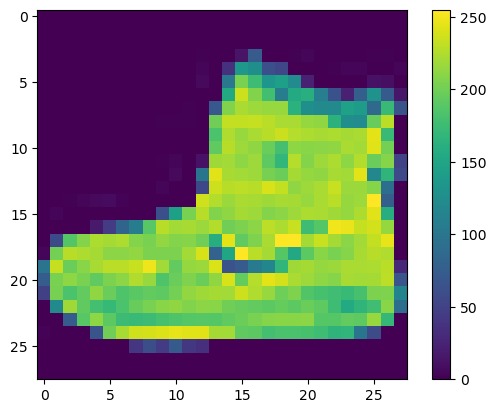

In [217]:
# ovako izgleda slika iz skupa za treniranje
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

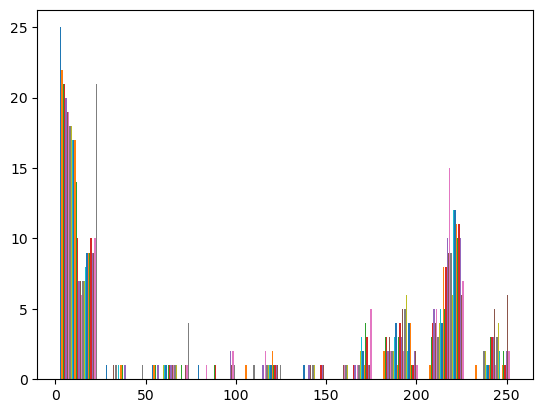

In [218]:
# ovo ce nam biti ulazi u mrezu 
_ = plt.hist(train_images[0])

In [219]:
# svodim opseg na 0 - 1 zbog IEEE 754
# sa 255 jer znamo da je to max, svakim pokretanjem pokrecem sve losiji rezultati, zato preimenovati obradjene podatke
train_images_processed = train_images / 255.0
test_images_processed = test_images / 255.0

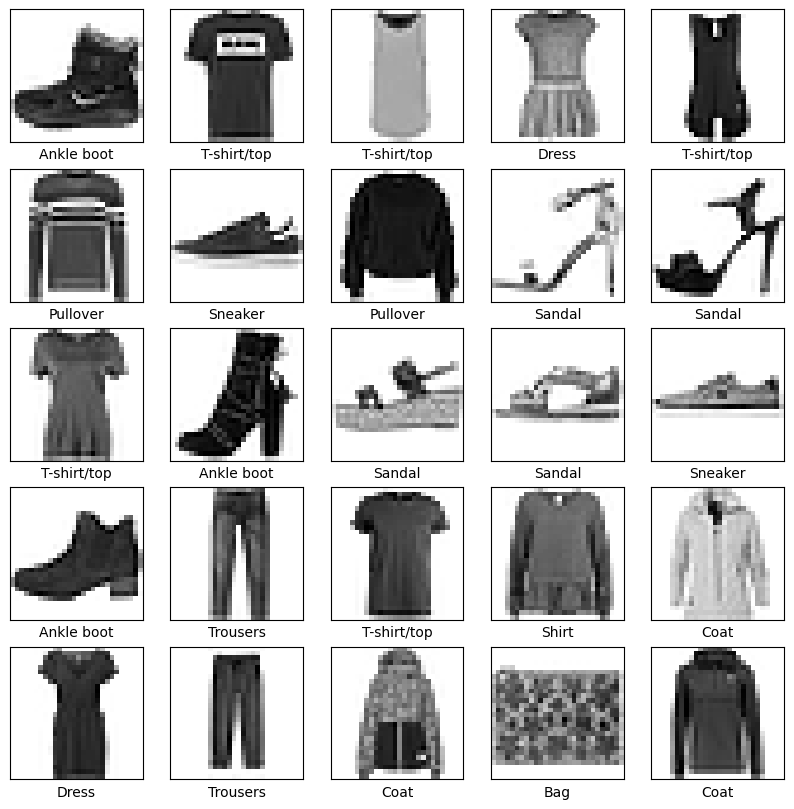

In [220]:
# vizualizacija skupa slika
plt.figure(figsize=(10,10))

# za prvih 25 cu staviti sliku 5 x 5, iskljucujem ticks na x i y osi i grid i color_map je plt.cm.binary i ispod svake ove class_names [train_label[i]]
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names [train_labels[i]])
plt.show()

In [221]:
# sada pravimo model koji ce kao ulaz uzeti sliku i kao izlaz dati kojoj kategoriji pripada
# radimo teras sa 3 tipa sloja 

# tf.keras.layers.Flatten - {28,28} -> 28 -> 784
# tf.keras.layers.Dense
# tf.keras.layers.Sequential

# Flatten sloj - Posto su nam slike (ulaz) su nam u obliku matrice sve su 28x28, i neuronska mreza uzima kao ulaz niz vrednosti i sliku moramo u niz da pretvorimo i za to koristimo  Flatten, gde cemo reci koje su dimenzije ulaz i on ce ulaz da izravna tako da ce sliku iz 28x28 matrice pretvoriti u niz od 784 elementa

# Dense sloj - znaci da je svaki izlaz iz prethodnog sloja povezan sa svakim ulazom u taj trenutni sloj, kojem su dodeljene tezine, i to je taj gust sloj 

#Sequential sloj - objedinjuje sve, definise celu arhitekturu mreze, ide sve jedno za drugim

In [222]:
# model je sekvencioni koji kao ulaz uzima izravnatu sliku kao niz brojeva
model = keras.Sequential([
    layers.Input(shape=(28, 28)),  # Definišemo ulazni oblik pomoću Input sloja
    layers.Flatten(),  # Sloj za izravnavanje slike
    layers.Dense(128, activation='relu'),  # Skriveni gust sloj sa 128 neurona
    layers.Dense(10, activation='softmax')  # Izlazni gust sloj sa 10 neurona
])
# za posledji uzimamo 10 neurona zbog 10 kategorija koje klasifikator uzima, dobijamo vektor dimenzije 10 - vec10(p1, p2, p3,...,p10)

In [223]:
 # moramo 9 da transformisemo u vektor, zbog racunanja loss fcije 
# labele moramo u vektore zbog loss fcije
# train_label[0] = 9 -> {0, 0, 0, 0, ..., 1.0}
# 3 -> (0,0,0,1.0,0,0,0,0,0) # artikal pripada sasvim sigurno kategoriji 3
# za to se ovo koristi

# train_label - klase slika u skupu za treniranje 
# test_label - klase tj. kategorije slika u skupu za testiranje 
train_labels_cat = keras.utils.to_categorical(train_labels)
test_labels_cat = keras.utils.to_categorical(test_labels)

In [224]:
# treba sada da iskompajliram model 
# pogledati aktivacione fcije 
# za optimizatora korisim adam
# loss racunamo sa kategorickom kros entropijom
model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy, metrics=['accuracy'])

In [225]:
# posle kompajliranja mozemo da istreniramo podatke, treniranje radi na procesoru ne na grafickoj 

# sklearn 
# fit fcija radi treniranje 
# predict fcjia radi predvidjanje na osnovu prosledjenih podataka
# u fciji fit ulaz je prvi argument, a drugi izlaz kategoricki, epoha je koliko ce puta da se izvrti 


model.fit(train_images_processed, train_labels_cat, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7831 - loss: 0.6209
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8604 - loss: 0.3819
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8760 - loss: 0.3398
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8843 - loss: 0.3118
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8910 - loss: 0.2905
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8970 - loss: 0.2749
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9015 - loss: 0.2644
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9054 - loss: 0.2557
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9068 - loss: 0.2457
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9114 - loss: 0.2368


In [226]:
# preciznost na test skupu
test_loss, test_acc = model.evaluate(test_images_processed, test_labels_cat, verbose=2)


313/313 - 1s - 3ms/step - accuracy: 0.8854 - loss: 0.3273


In [227]:
print(test_loss)
print(test_acc)

0.3273049592971802
0.8853999972343445


## 1. Loss (gubitak) je mera greške modela na test skupu podataka. Niža vrednost označava bolju prilagodbu modela.
### Gubitak od ~0.375 je prilično dobar, ali postoji prostor za poboljšanje. - test_loss

## 2. Accuracy (tačnost) pokazuje procenat ispravnih predikcija modela na test podacima. - test_acc
### Tačnost od 88.6% je solidan rezultat, posebno za Fashion MNIST dataset, gde se klasifikuje 10 različitih kategorija.

# Tumačenje:
## Model je dobro naučio obrasce iz trening skupa i generalizovao ih na test skup sa dobrom tačnošću.
## Međutim, razlika između gubitka i tačnosti može ukazivati na mogućnosti za optimizaciju, poput:
## Dodavanja regularizacije (L2 ili dropout).

# Dodatnog podešavanja hiperparametara (broj epoha, veličina slojeva itd.).
## Eksperimentisanja sa različitim arhitekturama (dublji ili širi modeli).

In [228]:
# overfitting (preprilagodjenost) - kada model na skupu za treniranje uci karakteristike skupa koje nama nisu bitne i zbog tih karakteristika nad skupom za treniranje ima bolje rezultate nego na skupu za testiranje. Zato sto skup za testiranje mozda ne sadrzi te sumove ili nepravilnosti koje je model naucio na skupu za treniranje pa imamo nesto losiji rezultat, ovde je to veoma malo ali nad vecim skupovima podataka vidi se razlika 

In [229]:
# sva predvidjanja 
predictions = model.predict(test_images_processed)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [230]:
predictions[0]

array([2.0494774e-08, 2.8172533e-07, 1.5000932e-08, 3.4465096e-12,
       1.8104754e-09, 1.0986415e-03, 1.5259960e-07, 9.0774093e-03,
       3.9149142e-09, 9.8982340e-01], dtype=float32)

In [231]:
# interpretacija verovatnoca

np.argmax(predictions[0])

9

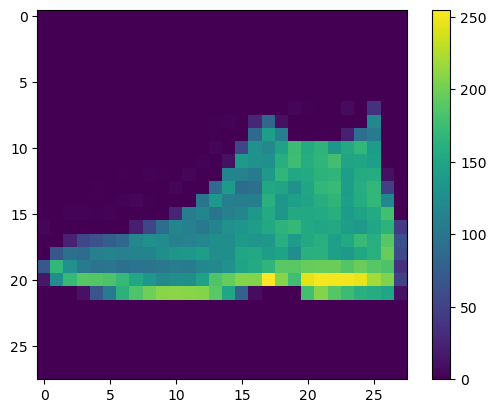

Ankle boot


In [233]:
# ovako izgleda slika iz skupa za treniranje
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()
print(class_names[9])
# zaista lici na cizmu

In [234]:
# za crtanje u lepsem foramtu 
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array,true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)

    if predicted_label == true_label:
        color = 'blue'
    else:
        color='red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names [predicted_label], 100*np.max(predictions_array),
    class_names [true_label]), color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar (range (10), predictions_array, color="#777777")

    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot [predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

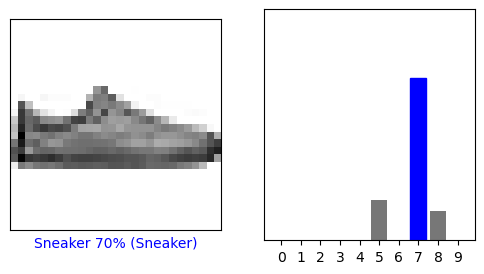

In [237]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

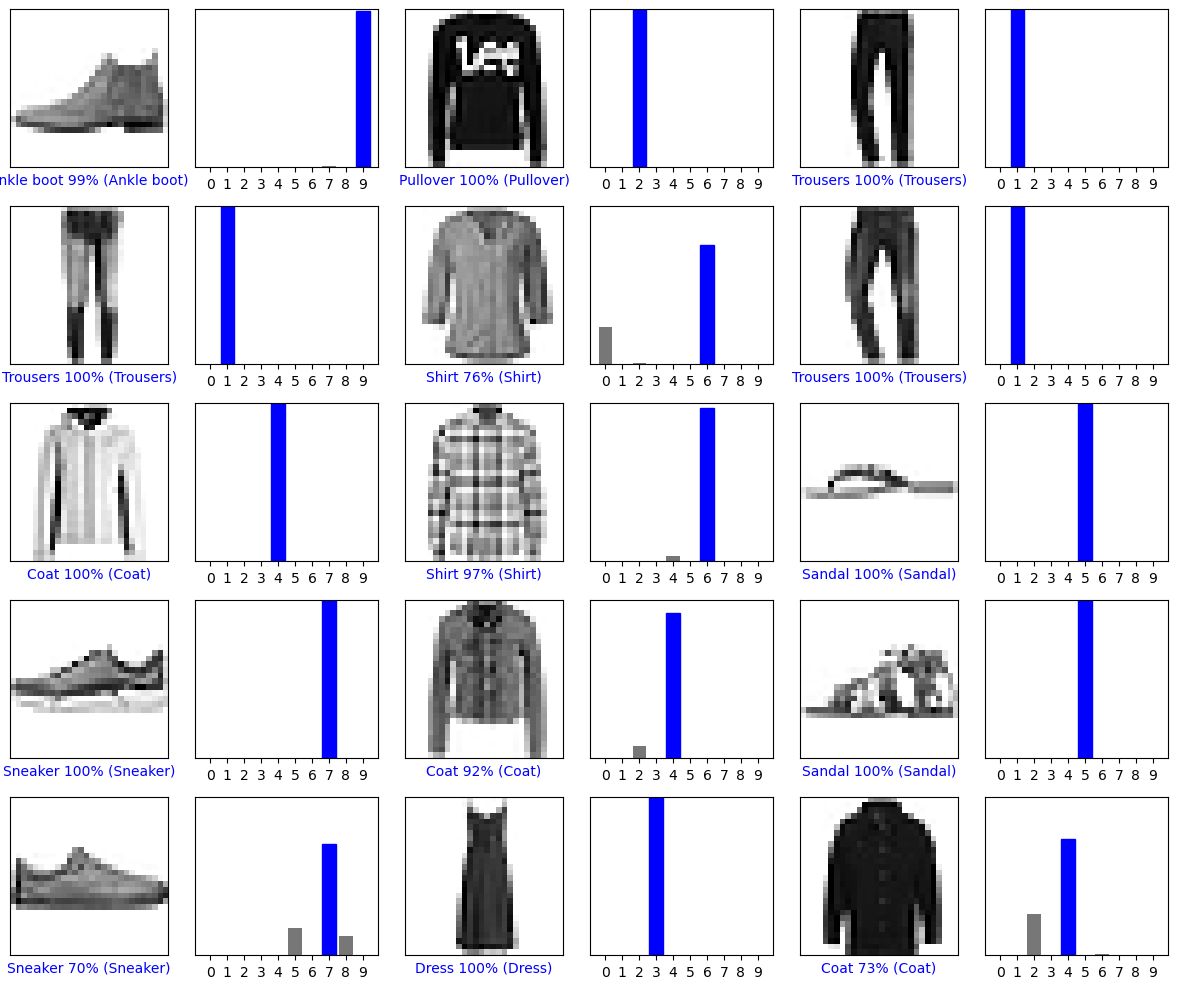

In [238]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()